# RobustScaler

## 簡單測試

In [22]:
# 測試資料
import numpy as np
data = np.array([[ 1., -2.,  2.],[ -2.,  1.,  3.],[ 4.,  1., -2.]])
data

array([[ 1., -2.,  2.],
       [-2.,  1.,  3.],
       [ 4.,  1., -2.]])

In [23]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit_transform(data)

array([[ 0. , -2. ,  0. ],
       [-1. ,  0. ,  0.4],
       [ 1. ,  0. , -1.6]])

## 驗證

,label,最小值,箱子下緣,中位數,箱子上緣,最大值
0,0,-2.0,-0.5,1.0,2.5,4.0
1,1,-2.0,-0.5,1.0,1.0,1.0
2,2,-2.0,0.0,2.0,2.5,3.0


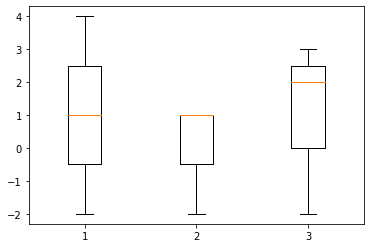

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

def get_box_plot_data(data, bp):
    rows_list = []

    for i in range(data.shape[1]):
        dict1 = {}
        dict1['label'] = i
        dict1['最小值'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['箱子下緣'] = bp['boxes'][i].get_ydata()[1]
        dict1['中位數'] = bp['medians'][i].get_ydata()[1]
        dict1['箱子上緣'] = bp['boxes'][i].get_ydata()[2]
        dict1['最大值'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

bp = plt.boxplot(data)
get_box_plot_data(data, bp)

In [34]:
# 計算中位數、IQR
median1 = np.median(data, axis=0)
scale1 = np.quantile(data, 0.75, axis=0) - np.quantile(data, 0.25, axis=0)
print(median1, scale1)
# 計算 RobustScaler
(data - median1) / scale1

[1. 1. 2.] [3.  1.5 2.5]


array([[ 0. , -2. ,  0. ],
       [-1. ,  0. ,  0.4],
       [ 1. ,  0. , -1.6]])

## 載入資料集

In [35]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [36]:
# X, y = datasets.load_iris(return_X_y=True)
X, y = datasets.load_breast_cancer(return_X_y=True)

## 3. 不須進行特徵工程

## 4. 資料分割

In [37]:
# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# 查看陣列維度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

## 特徵縮放

In [38]:
scaler = RobustScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## 5. 選擇演算法

In [39]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

## 6. 模型訓練

In [40]:
clf.fit(X_train_std, y_train)

LogisticRegression()

## 7. 模型計分

In [41]:
y_pred = clf.predict(X_test_std)
y_pred

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [42]:
# 計算準確率
print(f'{accuracy_score(y_test, y_pred)*100:.2f}%') 

95.61%


In [43]:
# 混淆矩陣
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[41  3]
 [ 2 68]]


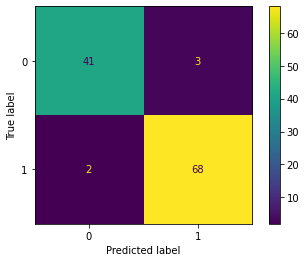

In [44]:
# 混淆矩陣圖
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot()
plt.show()

## 不進行特徵縮放

In [45]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# 計算準確率
print(f'{accuracy_score(y_test, y_pred)*100:.2f}%')

94.74%


C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
